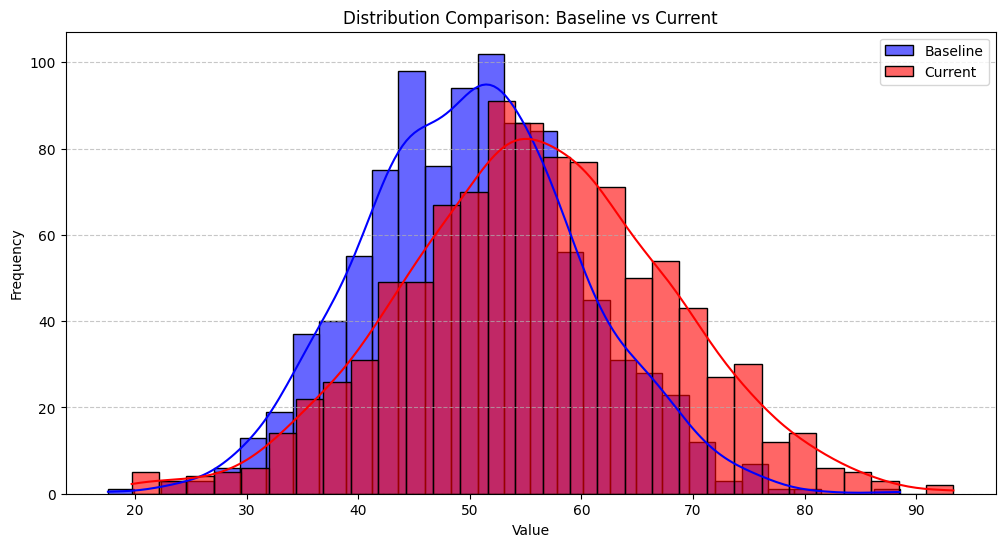

Data Drift Analysis:
Kolmogorov-Smirnov Test - Statistic: 0.2310, p-value: 0.0000
Wasserstein Distance: 5.7358
Kullback-Leibler Divergence: 0.0584


In [1]:
# Question: Detecting Data Drift
# Description: Identify potential data drift between two time periods for a numeric attribute.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp, wasserstein_distance, entropy

# Set seed for reproducibility
np.random.seed(42)

# Generate baseline data (e.g., last month)
baseline_data = np.random.normal(loc=50, scale=10, size=1000)

# Generate current data (e.g., this month)
# Simulate a shift by slightly changing the mean and scale
current_data = np.random.normal(loc=55, scale=12, size=1000)

# Create DataFrames
df_baseline = pd.DataFrame(baseline_data, columns=['Value'])
df_current = pd.DataFrame(current_data, columns=['Value'])

# Plot Histograms and KDEs
plt.figure(figsize=(12, 6))
sns.histplot(df_baseline['Value'], bins=30, kde=True, color='blue', label='Baseline', alpha=0.6)
sns.histplot(df_current['Value'], bins=30, kde=True, color='red', label='Current', alpha=0.6)
plt.title('Distribution Comparison: Baseline vs Current')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Statistical Analysis
ks_stat, ks_pvalue = ks_2samp(baseline_data, current_data)
wasserstein_dist = wasserstein_distance(baseline_data, current_data)

# KL Divergence (Ensure no zero values to avoid division by zero)
baseline_hist, _ = np.histogram(baseline_data, bins=30, density=True)
current_hist, _ = np.histogram(current_data, bins=30, density=True)

# Adding a small constant to avoid division by zero
epsilon = 1e-10
kl_div = entropy(baseline_hist + epsilon, current_hist + epsilon)

# Display Results
print("Data Drift Analysis:")
print(f"Kolmogorov-Smirnov Test - Statistic: {ks_stat:.4f}, p-value: {ks_pvalue:.4f}")
print(f"Wasserstein Distance: {wasserstein_dist:.4f}")
print(f"Kullback-Leibler Divergence: {kl_div:.4f}")
